# Jeux de données

In [1]:
%matplotlib inline
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import time
import random
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.neighbors import NearestNeighbors

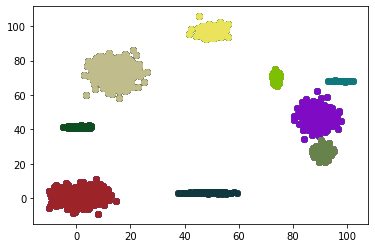

In [2]:
def loadData(file):
    data = arff.loadarff(open('./clustering-benchmark/src/main/resources/datasets/artificial/'+file+'.arff','r'))
    #print(data[0])
    return data[0]

def color_cluster(labels,x,y):
    color=[]
    for k in range(0,len(list(set(labels)))):
        color.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    newcolor=[]
    for i in range(0,len(labels)):
        newcolor.append(color[labels[i]])
    plt.scatter(x,y,color=newcolor)
    plt.show()
    

#print(cluster)

#color the clusters 
def colorCluster(file):
    x=[]
    y=[]
    cluster=[]
    data=loadData(file)
    #construction d'une liste contenant le cluster de chaque point
    for i in range(0,len(data)):
        cluster.append(data[i][2])
    for j in cluster:
        for dataa in data:
            if dataa[2]==j:
                x.append(dataa[0])
                y.append(dataa[1])
        plt.scatter(x,y,color=["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])])
        x=[]
        y=[]
    plt.show
    
    
colorCluster("2d-10c")
        



# Clustering k-Means

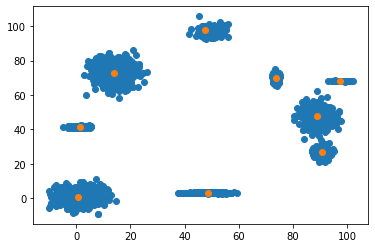

[7 7 7 ... 5 5 5]


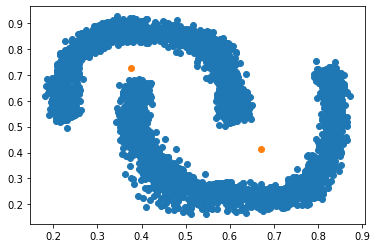

[1 1 1 ... 0 0 0]


In [3]:
#permet de construire la liste des coordonnées des points d'un dataset (ie x et y)
def xyConstruct(file):
    data=loadData(file)
    x=[]
    y=[]
    newdata=[]
    for i in range(0,len(data)):
        newdata.append((data[i][0],data[i][1]))
    for j in range(0,len(data)):
        x.append(newdata[j][0])
        y.append(newdata[j][1])
    return (x,y,newdata)

#on applique kmeans à un dataset
def kmeans(data,nb_clusters,x,y):
    xcenter=[]
    ycenter=[]

    kmeans = KMeans(n_clusters=nb_clusters, random_state=0).fit(data)
    for i in range(0,len(kmeans.cluster_centers_)):
        xcenter.append(kmeans.cluster_centers_[i][0])
        ycenter.append(kmeans.cluster_centers_[i][1])

    plt.scatter(x,y)
    plt.scatter(xcenter,ycenter)
    plt.show()

    labels = kmeans.labels_
    print(labels)

(x1,y1,newdata1)=xyConstruct("2d-10c")
kmeans(newdata1,9,x1,y1)
(x2,y2,newdata2)=xyConstruct("banana")
kmeans(newdata2,2,x2,y2)

FILE 2d-10c
SILHOUETTE
Temps=  2.5602798461914062
Nombre de cluster:  9


CALINSKI
Temps=  0.9665894508361816
Nombre de cluster:  18


DAVIES BOULDIN
Temps=  0.9777367115020752
Nombre de cluster:  9




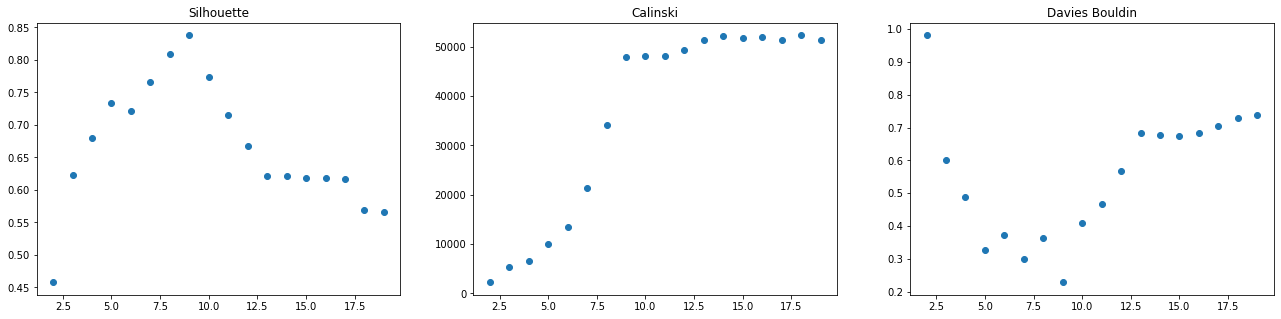

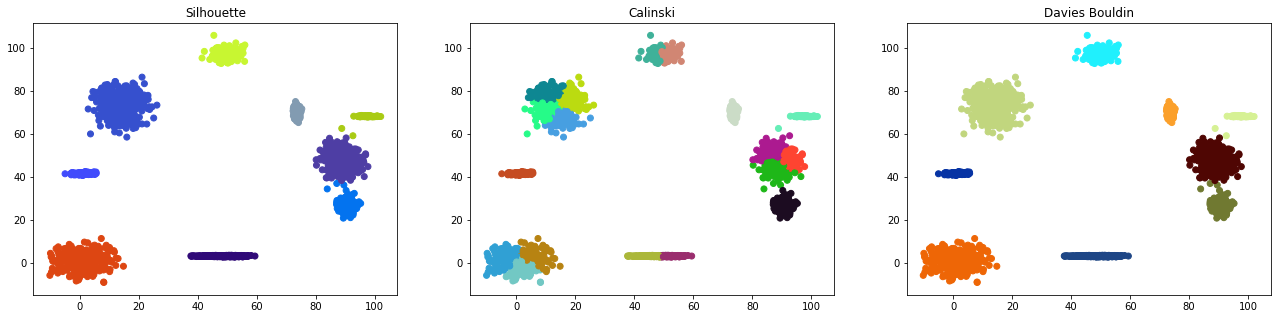

FILE 3-spiral
SILHOUETTE
Temps=  0.7605211734771729
Nombre de cluster:  19


CALINSKI
Temps=  0.680422306060791
Nombre de cluster:  18


DAVIES BOULDIN
Temps=  0.7143557071685791
Nombre de cluster:  13




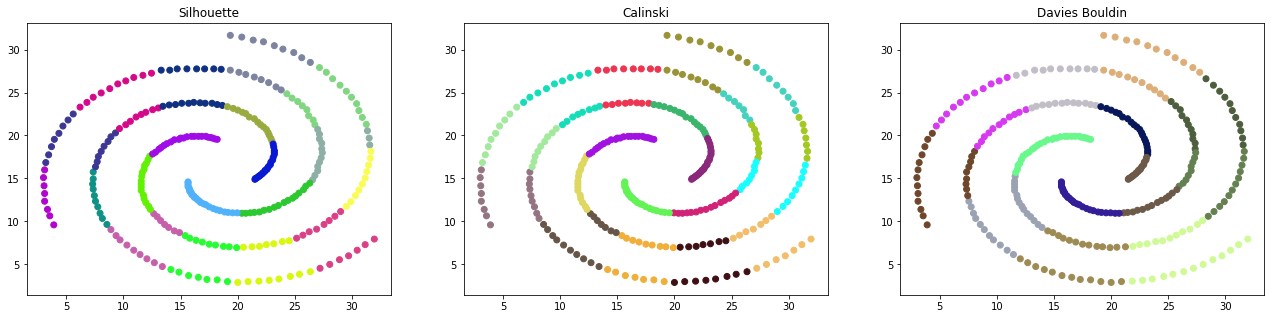

FILE banana
SILHOUETTE
Temps=  5.76819920539856
Nombre de cluster:  8


CALINSKI
Temps=  1.8979434967041016
Nombre de cluster:  19


DAVIES BOULDIN
Temps=  1.9058477878570557
Nombre de cluster:  10




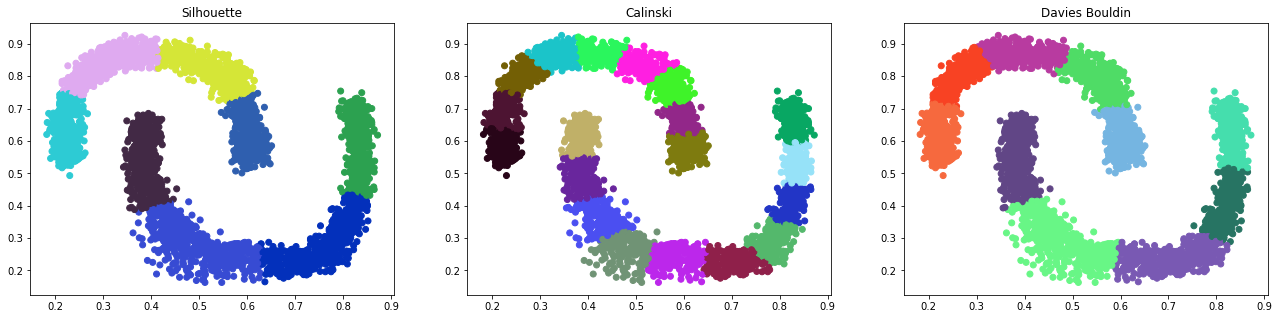

In [4]:
(x1,y1,newdata1)=xyConstruct("2d-10c")
(x2,y2,newdata2)=xyConstruct("banana")
(x3,y3,newdata3)=xyConstruct("3-spiral")


#for i in range(0,len(data)):
#    newdata.append([data[i][0],data[i][1]])
#print(newdata)
def silhouette_metrics_kmeans(debut,fin,data):
    start = time.time()
    meilleur=0
    nbcluster=0
    bestlabels=0
    score_list = []
    for i in range(debut,fin):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
        labels = kmeans.labels_
        score = metrics.silhouette_score(data, labels, metric='euclidean')
        score_list.append(score)
        if(score>meilleur):
            meilleur=score
            nbcluster=i
            bestlabels=labels
    end = time.time()
    temps = end - start   
    print("SILHOUETTE")
    print("Temps= ",temps)
    print("Nombre de cluster: ", nbcluster)
    print('\n')
    return score_list,bestlabels
    


def davies_bouldin_metrics_kmeans(debut,fin,data): 
    start = time.time()
    meilleur=99
    nbcluster=0
    bestlabels=0
    score_list=[]
    for i in range(debut,fin):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
        labels = kmeans.labels_
        score = metrics.davies_bouldin_score(data, labels)
        score_list.append(score)
        if(score<meilleur):
            meilleur=score
            nbcluster=i
            bestlabels=labels
    end = time.time()
    temps = end - start       

    print("DAVIES BOULDIN")
    print("Temps= ",temps)
    print("Nombre de cluster: ", nbcluster)
    print('\n')
    return score_list,bestlabels


    
def calinski_metrics_kmeans(debut,fin,data):    
    start = time.time()
    meilleur=0
    nbcluster=0
    score_list=[]
    bestlabels=0
    for i in range(debut,fin):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
        labels = kmeans.labels_
        score = metrics.calinski_harabasz_score(data, labels)
        score_list.append(score)
        #print(i,metrics.calinski_harabasz_score(newdata, labels))
        if(score>meilleur):
            meilleur=score
            nbcluster=i
            bestlabels=labels
    end = time.time()
    temps = end - start       

    print("CALINSKI")
    print("Temps= ",temps)
    print("Nombre de cluster: ",nbcluster)
    print('\n')
    return score_list,bestlabels
    
def plot_score(score_list1,score_list2,score_list3,debut,fin):
    fig = plt.figure(figsize=(30,5))
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax1.set_title("Silhouette")
    ax2.set_title("Calinski")
    ax3.set_title("Davies Bouldin")
    
    x=list(range(debut,fin))
    ax1.scatter(x,score_list1)
    ax2.scatter(x,score_list2)
    ax3.scatter(x,score_list3)
    plt.show()
    
def plot_color(x,y,labels,name,ax):
    color=[]
    for i in range(0,11000):
        color.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))

    newcolor=[]
    #print(labels)
    for i in range(0,len(labels)):

        newcolor.append(color[labels[i]])

    ax.scatter(x,y,color=newcolor)
    ax.set_title(name)

def tri_plot(x,y,labels1,labels2,labels3):
    fig = plt.figure(figsize=(30,5))
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    plot_color(x,y,labels1,"Silhouette",ax1) 
    plot_color(x,y,labels2,"Calinski",ax2) 
    plot_color(x,y,labels3,"Davies Bouldin",ax3) 
    plt.show()
    
print("FILE 2d-10c")
score1,labels1=silhouette_metrics_kmeans(2,20,newdata1)
score2,labels2=calinski_metrics_kmeans(2,20,newdata1)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,newdata1)
plot_score(score1,score2,score3,2,20)
tri_plot(x1,y1,labels1,labels2,labels3)

print("FILE 3-spiral")
score1,labels1=silhouette_metrics_kmeans(2,20,newdata3)
score2,labels2=calinski_metrics_kmeans(2,20,newdata3)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,newdata3)
#plot_score(score1,score2,score3,2,20)
tri_plot(x3,y3,labels1,labels2,labels3)

print("FILE banana")
score1,labels1=silhouette_metrics_kmeans(2,20,newdata2)
score2,labels2=calinski_metrics_kmeans(2,20,newdata2)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,newdata2)
#plot_score(score1,score2,score3,2,20)
tri_plot(x2,y2,labels1,labels2,labels3)

#Calinski pas adapté à ce jeu de donnée ou à cette méthode
#Les jeux de données banana et 3-spiral ne sont pas adaptés à k-means car ils ne sont pas convexes 


# Clustering agglomératif

Intérêts de la méthode

ward :	0.13s
average :	0.10s
complete :	0.11s
single :	0.03s


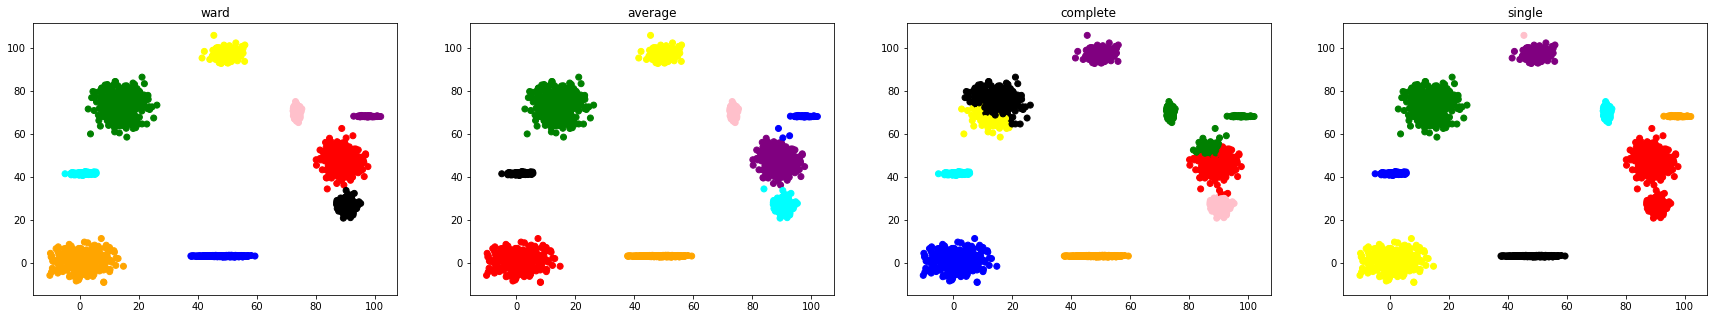

In [5]:
(x1,y1,newdata1)=xyConstruct("2d-10c")

fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
tabax=[ax1,ax2,ax3,ax4]
j=0
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=9)
    t0 = time.time()
    clustering.fit(newdata1)
    print("%s :\t%.2fs" % (linkage, time.time() - t0))
    
    labels=clustering.labels_
    color=["green","red","blue","yellow","orange","black","cyan","pink","purple","brown","grey"]
    
    newcolor=[]
    #print(labels)
    for i in range(0,len(labels)):
        
        newcolor.append(color[labels[i]])
        
    tabax[j].scatter(x1,y1,color=newcolor)
    tabax[j].set_title(linkage)

    plt.show
    j+=1



FILE diamond9
ward
SILHOUETTE
ward :	0.34s
Nombre de cluster:  8


CALINSKI
ward :	0.20s
Nombre de cluster:  19


BOULDIN
ward :	0.23s
Nombre de cluster:  13




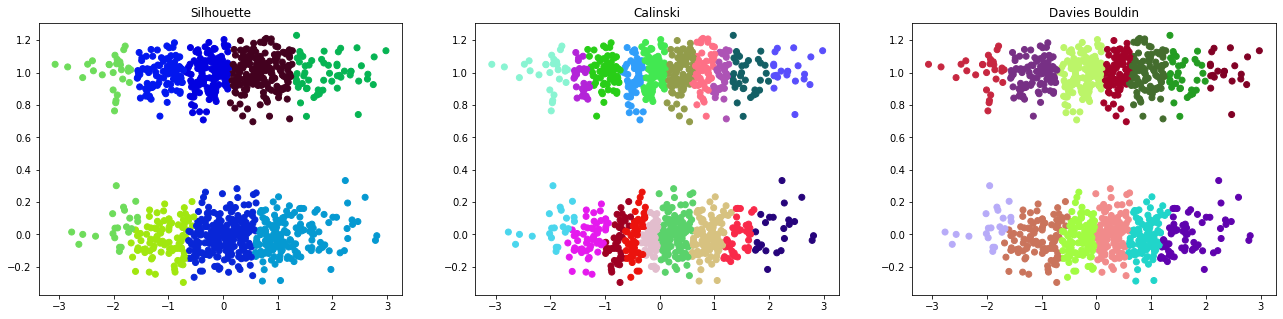

average
SILHOUETTE
average :	0.34s
Nombre de cluster:  11


CALINSKI
average :	0.19s
Nombre de cluster:  13


BOULDIN
average :	0.21s
Nombre de cluster:  17




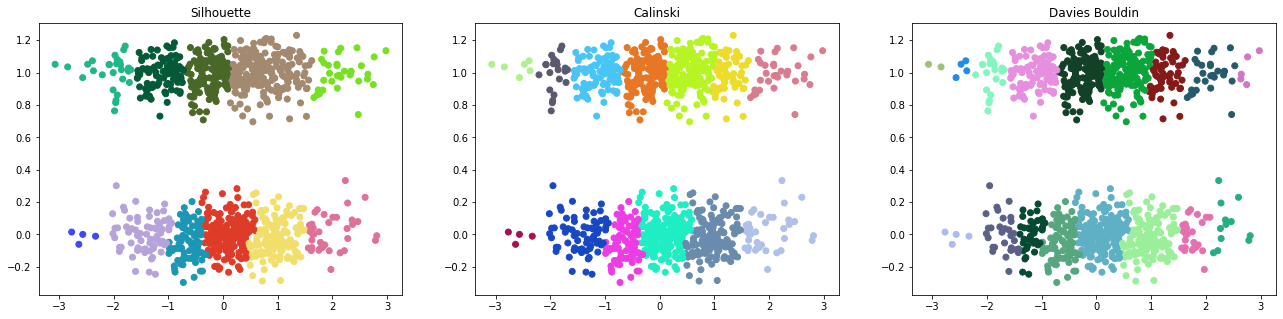

complete
SILHOUETTE
complete :	0.31s
Nombre de cluster:  15


CALINSKI
complete :	0.18s
Nombre de cluster:  19


BOULDIN
complete :	0.20s
Nombre de cluster:  13




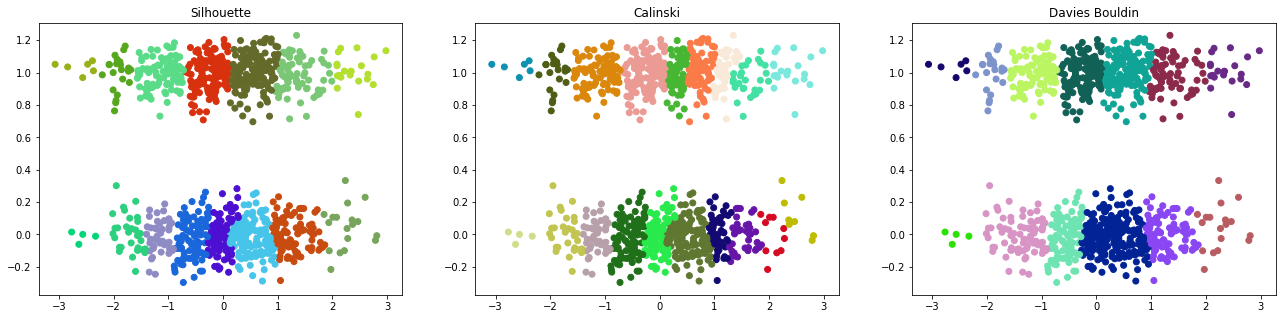

single
SILHOUETTE
single :	0.25s
Nombre de cluster:  2


CALINSKI
single :	0.11s
Nombre de cluster:  2


BOULDIN
single :	0.13s
Nombre de cluster:  19




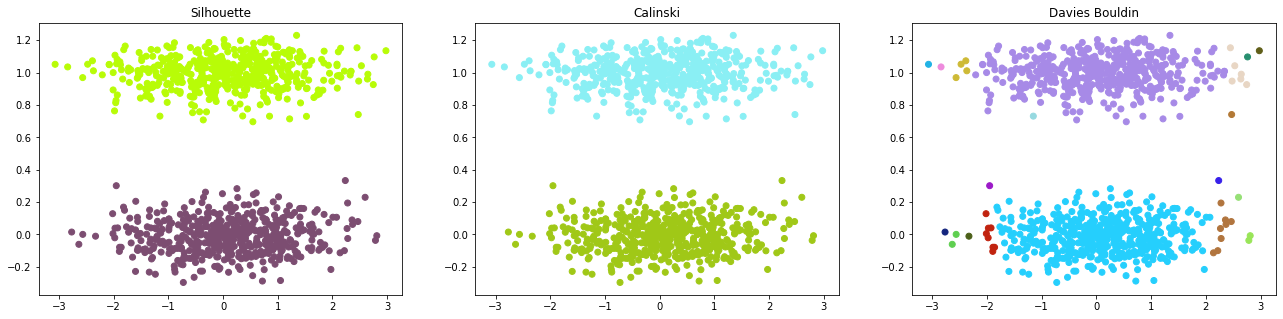

In [6]:

def silhouette_metrics_agglo(x,y,debut,fin,data,linkage):
    print("SILHOUETTE")
    meilleur=0
    nbcluster=0
    bestlabels=0
    score_list=[]
    t0 = time.time()
    for i in range(debut,fin):
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=i)
        clustering.fit(data)
        labels=clustering.labels_
        score = metrics.silhouette_score(data, labels, metric='euclidean')
        score_list.append(score)
        if(score>meilleur):
            meilleur=score
            nbcluster=i
            bestlabels=labels
    print("%s :\t%.2fs" % (linkage, time.time() - t0))
    print("Nombre de cluster: ", nbcluster)
    print('\n')
    #color_cluster(bestlabels,x1,y1)
    return score_list,bestlabels

def calinski_metrics_agglo(x,y,debut,fin,data,linkage):
    print("CALINSKI")
    meilleur=0
    nbcluster=0
    bestlabels=0
    score_list=[]
    t0 = time.time()
    for i in range(debut,fin):
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=i)
        clustering.fit(data)
        labels=clustering.labels_
        score = metrics.calinski_harabasz_score(data, labels)
        score_list.append(score)
        if(score>meilleur):
            meilleur=score
            nbcluster=i
            bestlabels = labels
    print("%s :\t%.2fs" % (linkage, time.time() - t0))
    print("Nombre de cluster: ", nbcluster)
    print('\n')
    return score_list,bestlabels
        
def davies_bouldin_metrics_agglo(x,y,debut,fin,data,linkage):
    print("BOULDIN")
    meilleur=99
    nbcluster=0
    bestlabels=0
    score_list=[]
    t0 = time.time()
    for i in range(debut,fin):
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=i)
        clustering.fit(data)
        labels=clustering.labels_
        score=metrics.davies_bouldin_score(data, labels)
        score_list.append(score)
        if(score<meilleur):
            meilleur=score
            nbcluster=i
            bestlabels = labels 
    print("%s :\t%.2fs" % (linkage, time.time() - t0))
    print("Nombre de cluster: ", nbcluster)
    print('\n')
    return score_list,bestlabels

        

(x1,y1,newdata1)=xyConstruct("long1")
print("FILE diamond9")
for linkage in ('ward','average','complete','single'):
    print(linkage)
    score1,labels1=silhouette_metrics_agglo(x1,y1,2,20,newdata1,linkage)
    score2,labels2=calinski_metrics_agglo(x1,y1,2,20,newdata1,linkage)
    score3,labels3=davies_bouldin_metrics_agglo(x1,y1,2,20,newdata1,linkage)
    #plot_score(score1,score2,score3,2,20)
    tri_plot(x1,y1,labels1,labels2,labels3)


# Clustering DBSCAN

Intérêts de la méthode

DBSCAN :	0.02s


<function matplotlib.pyplot.show(close=None, block=None)>

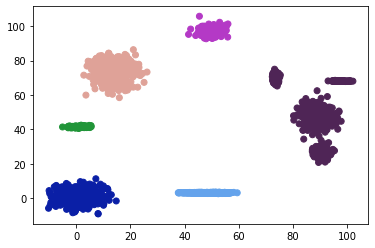

In [7]:
(x1,y1,newdata1)=xyConstruct("2d-10c")
clustering = DBSCAN(eps=15, min_samples=5)
t0 = time.time()
clustering.fit(newdata1)
print("%s :\t%.2fs" % ('DBSCAN', time.time() - t0))
    
labels=clustering.labels_
color=[]
for i in range(0,100):
    color.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    
newcolor=[]
#print(labels)
for i in range(0,len(labels)):
        
    newcolor.append(color[labels[i]])
        
plt.scatter(x1,y1,color=newcolor)

plt.show

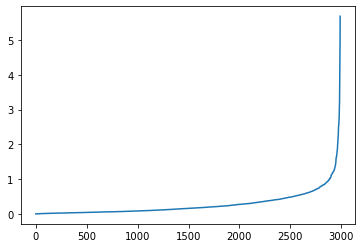

In [8]:
def elbow (data):
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

(x2,y2,newdata3)=xyConstruct("2d-10c")

elbow(newdata3)

banana
SILHOUETTE
Temps :	8.57s
Pair (0.05, 2)


CALINSKI
Temps :	7.02s
Pair (0.05, 2)


BOULDIN
Temps :	7.01s
Pair (0.05, 2)




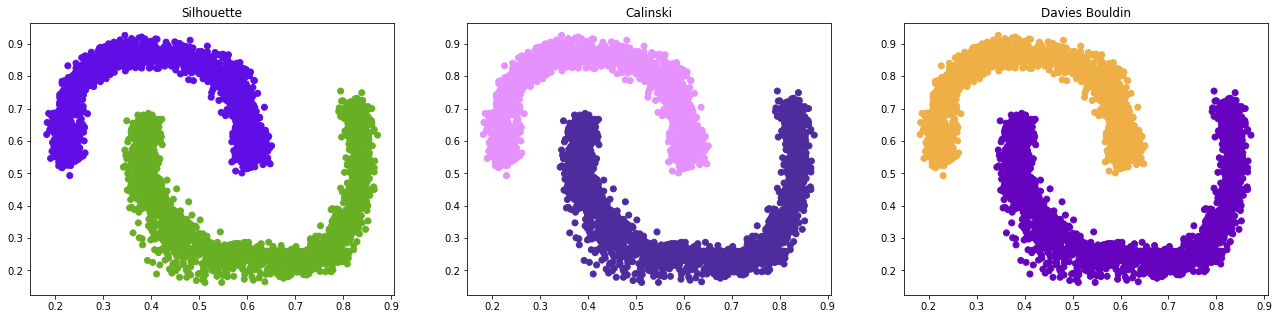

FILE 2d-10c
SILHOUETTE
Temps :	36.80s
Pair (5.6999999999999975, 2)


CALINSKI
Temps :	6.82s
Pair (5.6999999999999975, 2)


BOULDIN
Temps :	7.23s
Pair (5.0, 2)




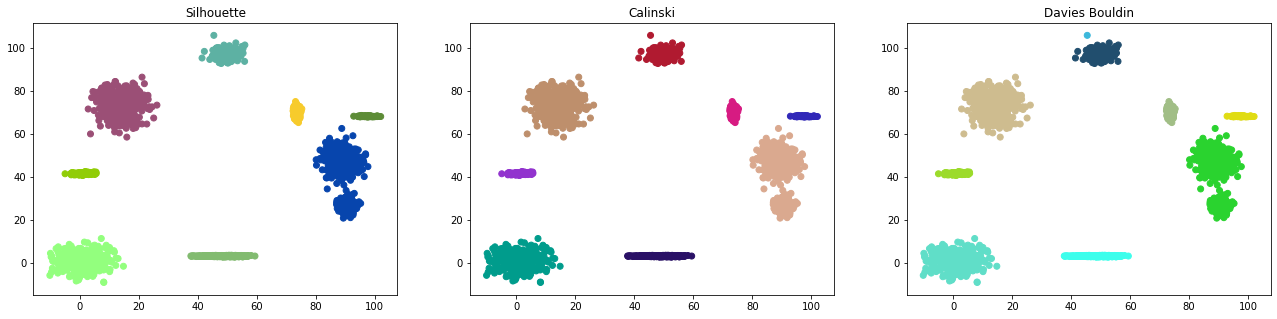

In [9]:
(x1,y1,newdata1)=xyConstruct("banana")


def silhouette_metrics_dbscan(data,debut,fin,itera):
    pair=0
    print("SILHOUETTE")
    meilleur=0
    bestlabels=0
    score_list=[]
    t0 = time.time()
    
    for i in np.arange(debut,fin,itera):
        for j in range(2,10):
            try: 
                clustering = DBSCAN(eps=i, min_samples=j)
                clustering.fit(data)
                labels=clustering.labels_
                score = metrics.silhouette_score(data, labels, metric='euclidean')
                score_list.append(score)
                if(score>meilleur):
                    meilleur=score
                    pair=(i,j)
                    bestlabels = labels
            except Exception as inst: 
                #print(inst)
                pass
    print("%s :\t%.2fs" % ('Temps', time.time() - t0))
    #color_cluster(bestlabels,x1,y1)
    print('Pair',pair)
    print('\n')
    return score_list,bestlabels
        
def davies_bouldin_metrics_dbscan(data,debut,fin,itera):
    pair=0
    print("BOULDIN")
    meilleur=99
    bestlabels=0
    score_list=[]
    t0 = time.time()
    for i in np.arange(debut,fin,itera):
        for j in range(2,10):
            try:
                clustering = DBSCAN(eps=i, min_samples=j)
                clustering.fit(data)
                labels=clustering.labels_
                score = metrics.davies_bouldin_score(data, labels)
                score_list.append(score)
                if(score<meilleur):
                    meilleur=score
                    pair=(i,j)
                    bestlabels = labels
            except Exception as inst: 
                #print(inst)
                pass
    print("%s :\t%.2fs" % ('Temps', time.time() - t0))
    #color_cluster(bestlabels,x1,y1)
    print('Pair',pair)
    print('\n')
    return score_list,bestlabels

def calinski_metrics_dbscan(data,debut,fin,itera):
    pair=0
    print("CALINSKI")
    meilleur=0
    bestlabels=0
    score_list=[]
    t0 = time.time()
    for i in np.arange(debut,fin,itera):
        for j in range(2,10):
            try:
                clustering = DBSCAN(eps=i, min_samples=j)
                clustering.fit(data)
                labels=clustering.labels_
                score = metrics.calinski_harabasz_score(data, labels)
                score_list.append(score)
                if(score>meilleur):
                    meilleur=score
                    pair=(i,j)
                    bestlabels = labels
            except Exception as inst: 
                #print(inst)
                pass
    print("%s :\t%.2fs" % ('Temps', time.time() - t0))
    #color_cluster(bestlabels,x1,y1)
    print('Pair',pair)
    print('\n')
    return score_list,bestlabels

#silhouette_metrics_dbscan(newdata1)
#calinski_metrics_dbscan(newdata1)
#davies_bouldin_metrics_dbscan(newdata1)

print("banana")
score1,labels1=silhouette_metrics_dbscan(newdata1,0,0.5,0.05)
score2,labels2=calinski_metrics_dbscan(newdata1,0,0.5,0.05)
score3,labels3=davies_bouldin_metrics_dbscan(newdata1,0,0.5,0.05)
#plot_score(score1,score2,score3,0,81)
tri_plot(x1,y1,labels1,labels2,labels3)

(x1,y1,newdata1)=xyConstruct("2d-10c")
print("FILE 2d-10c")
score1,labels1=silhouette_metrics_dbscan(newdata1,5,10,0.1)
score2,labels2=calinski_metrics_dbscan(newdata1,5,10,0.1)
score3,labels3=davies_bouldin_metrics_dbscan(newdata1,5,10,0.1)
#plot_score(score1,score2,score3,0,81)
tri_plot(x1,y1,labels1,labels2,labels3)

#(x1,y1,newdata1)=xyConstruct("tr.data")
#print("FILE tr.data")
#score1,labels1=silhouette_metrics_dbscan(newdata1)
#score2,labels2=calinski_metrics_dbscan(newdata1)
#score3,labels3=davies_bouldin_metrics_dbscan(newdata1)
#plot_score(score1,score2,score3,0,81)
#tri_plot(x1,y1,labels1,labels2,labels3)

# Clustering HDBSCAN

DBSCAN :	0.04s


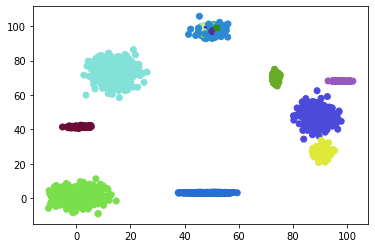

In [10]:
(x1,y1,newdata1)=xyConstruct("2d-10c")
t0 = time.time()
clustering = hdbscan.HDBSCAN(min_cluster_size=4)
labels=clustering.fit_predict(newdata1)
print("%s :\t%.2fs" % ('DBSCAN', time.time() - t0))
color=[]
for i in range(0,1000):
    color.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
newcolor=[]
for i in range(0,len(labels)):       
    newcolor.append(color[labels[i]])     
plt.scatter(x1,y1,color=newcolor)
plt.show()

SILHOUETTE
Temps :	4.60s
Min cluster size 3


BOULDIN
Temps :	1.25s
Min cluster size 3


CALINSKI
Temps :	1.15s
Min cluster size 3




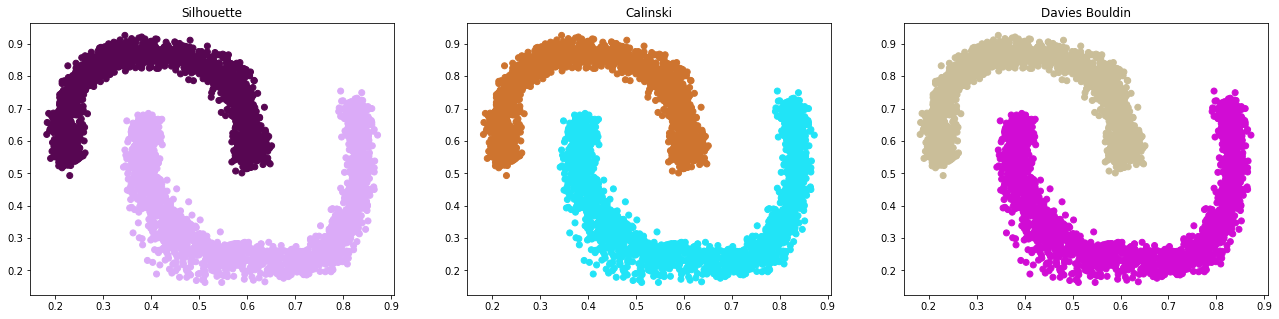

In [11]:
def silhouette_metrics_hdbscan(data):
    print("SILHOUETTE")
    min_cluster_size=0
    meilleur=0
    bestlabels=0
    score_list=[]
    t0 = time.time()
    for i in range(2,20):
        clustering = hdbscan.HDBSCAN(min_cluster_size=i)
        labels=clustering.fit_predict(data)
        score = metrics.silhouette_score(data, labels, metric='euclidean')
        score_list.append(score)
        if(score>meilleur):
            meilleur=score
            min_cluster_size=i
            best_labels=labels
    print("%s :\t%.2fs" % ('Temps', time.time() - t0))
    print('Min cluster size',min_cluster_size)
    print('\n')
    #color_cluster(best_labels,x1,y1)
    return score_list,best_labels
     
def davies_bouldin_metrics_hdbscan(data):
    print("BOULDIN")
    min_cluster_size=0
    meilleur=99 
    bestlabels=0
    score_list=[]
    t0 = time.time()
    for i in range(2,20):
        clustering = hdbscan.HDBSCAN(min_cluster_size=i)
        labels=clustering.fit_predict(data)
        score = metrics.davies_bouldin_score(data, labels)
        score_list.append(score)
        if(score<meilleur):
            meilleur=score
            min_cluster_size=i
            best_labels=labels
    print("%s :\t%.2fs" % ('Temps', time.time() - t0))
    print('Min cluster size',min_cluster_size)
    print('\n')
    #color_cluster(best_labels,x1,y1)
    return score_list,best_labels

def calinski_metrics_hdbscan(data):
    print("CALINSKI")    
    min_cluster_size=0
    meilleur=0
    t0 = time.time()
    score_list=[]
    for i in range(2,20):
        clustering = hdbscan.HDBSCAN(min_cluster_size=i)
        labels=clustering.fit_predict(data)
        score = metrics.calinski_harabasz_score(data, labels)
        score_list.append(score)
        if(score>meilleur):
            meilleur=score
            min_cluster_size=i
            best_labels=labels
    print("%s :\t%.2fs" % ('Temps', time.time() - t0))
    print('Min cluster size',min_cluster_size)
    print('\n')
    #color_cluster(best_labels,x1,y1)
    return score_list,best_labels
    
(x1,y1,newdata1)=xyConstruct("banana")
score1,labels1=silhouette_metrics_hdbscan(newdata1)
score2,labels2=davies_bouldin_metrics_hdbscan(newdata1)
score3,labels3=calinski_metrics_hdbscan(newdata1)
tri_plot(x1,y1,labels1,labels2,labels3)

# Synthèse

In [12]:
def loadDataSynthese(file):
    data = np.loadtxt('./dataset/'+file)
    #print(data)
    return data

data=loadDataSynthese("tr.data")


#silhouette_metrics_kmeans(2,20,data)
#calinski_metrics_kmeans(2,20,data)
#davies_bouldin_metrics_kmeans(2,20,data)

#silhouette_metrics_agglo(2,20,data)
#calinski_metrics_agglo(2,20,data)
#davies_bouldin_metrics_agglo(2,20,data)

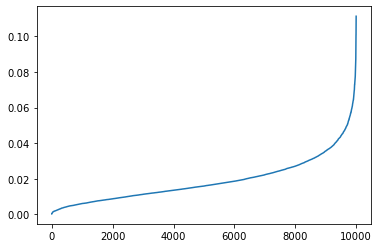

In [54]:
def xyConstruct2(file):
    data=loadDataSynthese(file)
    x=[]
    y=[]
    newdata=[]
    for i in range(0,len(data)):
        newdata.append((data[i][0],data[i][1]))
    for j in range(0,len(data)):
        x.append(newdata[j][0])
        y.append(newdata[j][1])
    return (x,y,newdata)

(x,y,data)=xyConstruct2("tr.data")

def elbow (data):
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

elbow(data)

---------- tr.data ----------
---------- DBSCAN ----------
SILHOUETTE
Temps :	288.30s
Pair (0.2, 8)


CALINSKI
Temps :	24.73s
Pair (0.2, 8)


BOULDIN
Temps :	24.93s
Pair (0.2, 8)




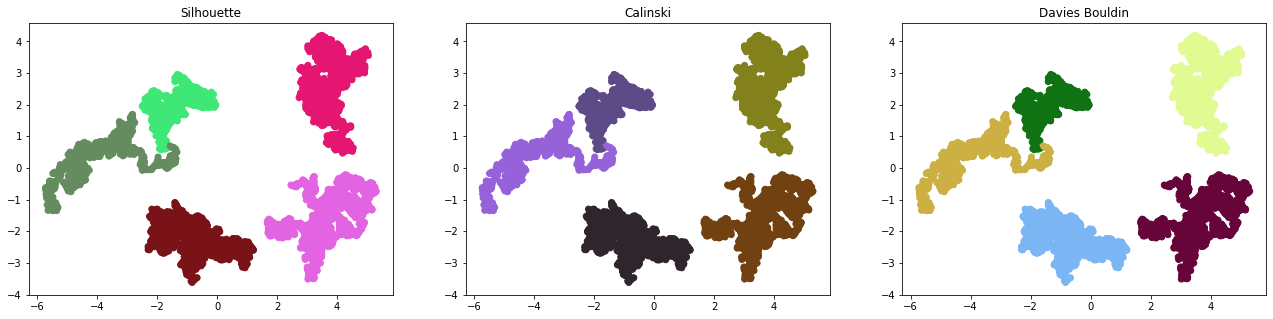

'\nprint("---------- HDBSCAN ----------")\n(x1,y1,newdata1)=xyConstruct2("tr.data")\nscore1,labels1=silhouette_metrics_hdbscan(newdata1)\nscore2,labels2=davies_bouldin_metrics_hdbscan(newdata1)\nscore3,labels3=calinski_metrics_hdbscan(newdata1)\ntri_plot(x1,y1,labels1,labels2,labels3)'

In [55]:
print("---------- tr.data ----------")
"""
print("---------- KMEANS ----------")
score1,labels1=silhouette_metrics_kmeans(2,20,data)
score2,labels2=calinski_metrics_kmeans(2,20,data)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,data)
tri_plot(x,y,labels1,labels2,labels3)

print("---------- Agglomératif ----------")
for linkage in ('ward','average','complete','single'):
    print(linkage)
    score1,labels1=silhouette_metrics_agglo(x,y,2,20,data,linkage)
    score2,labels2=calinski_metrics_agglo(x,y,2,20,data,linkage)
    score3,labels3=davies_bouldin_metrics_agglo(x,y,2,20,data,linkage)
    #plot_score(score1,score2,score3,2,20)
    tri_plot(x,y,labels1,labels2,labels3)
"""
print("---------- DBSCAN ----------")
score1,labels1=silhouette_metrics_dbscan(data,0.2,0.6,0.01)
score2,labels2=calinski_metrics_dbscan(data,0.2,0.6,0.01)
score3,labels3=davies_bouldin_metrics_dbscan(data,0.2,0.6,0.01)
tri_plot(x,y,labels1,labels2,labels3)

"""
print("---------- HDBSCAN ----------")
(x1,y1,newdata1)=xyConstruct2("tr.data")
score1,labels1=silhouette_metrics_hdbscan(newdata1)
score2,labels2=davies_bouldin_metrics_hdbscan(newdata1)
score3,labels3=calinski_metrics_hdbscan(newdata1)
tri_plot(x1,y1,labels1,labels2,labels3)"""

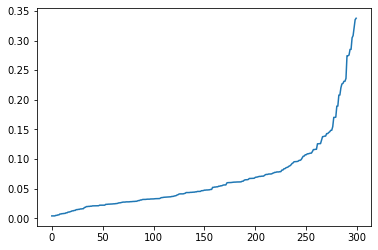

In [35]:
(x,y,data)=xyConstruct2("zgn.data")

elbow(data)

---------- zgn.data ----------
---------- DBSCAN ----------
SILHOUETTE
Temps :	0.14s
Pair (0.07, 2)


CALINSKI
Temps :	0.08s
Pair (0.07, 5)


BOULDIN
Temps :	0.13s
Pair (0.02, 3)




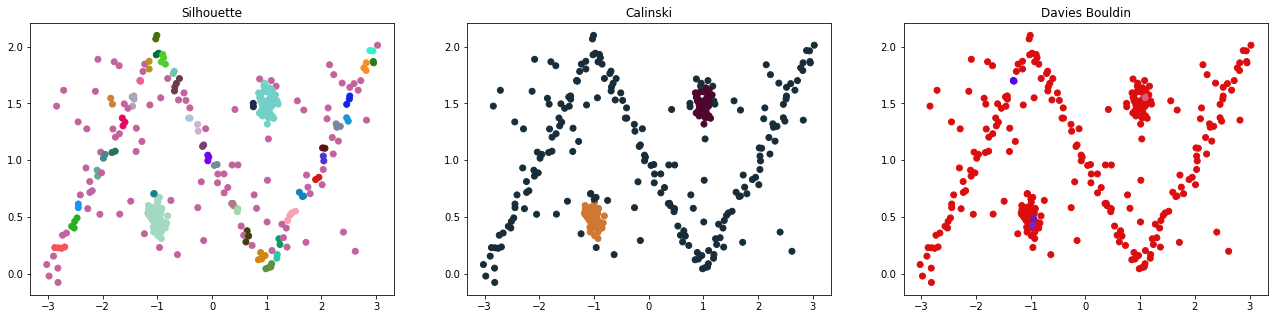

---------- HDBSCAN ----------
SILHOUETTE
Temps :	0.09s
Min cluster size 2


BOULDIN
Temps :	0.09s
Min cluster size 16


CALINSKI
Temps :	0.07s
Min cluster size 8




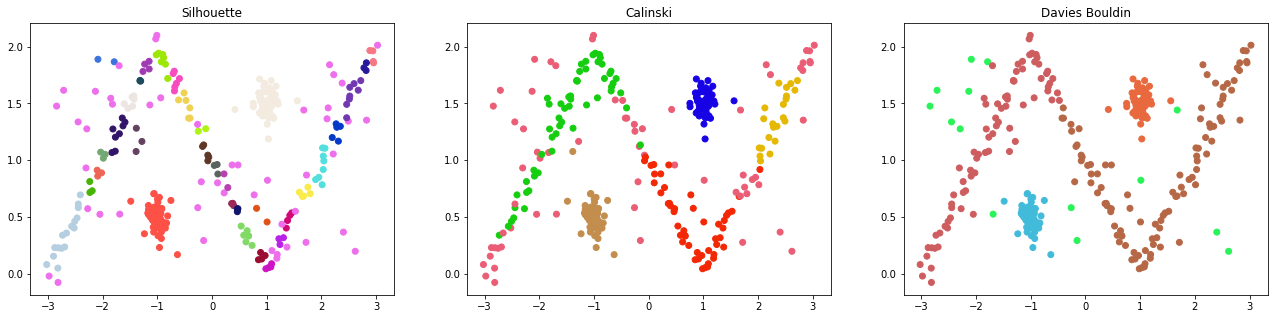

In [36]:
print("---------- zgn.data ----------")
"""
print("---------- KMEANS ----------")
score1,labels1=silhouette_metrics_kmeans(2,20,data)
score2,labels2=calinski_metrics_kmeans(2,20,data)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,data)
tri_plot(x,y,labels1,labels2,labels3)

print("---------- Agglomératif ----------")
for linkage in ('ward','average','complete','single'):
    print(linkage)
    score1,labels1=silhouette_metrics_agglo(x,y,2,20,data,linkage)
    score2,labels2=calinski_metrics_agglo(x,y,2,20,data,linkage)
    score3,labels3=davies_bouldin_metrics_agglo(x,y,2,20,data,linkage)
    #plot_score(score1,score2,score3,2,20)
    tri_plot(x,y,labels1,labels2,labels3)
"""
print("---------- DBSCAN ----------")
score1,labels1=silhouette_metrics_dbscan(data,0,0.08,0.01)
score2,labels2=calinski_metrics_dbscan(data,0,0.08,0.01)
score3,labels3=davies_bouldin_metrics_dbscan(data,0,0.08,0.01)
tri_plot(x,y,labels1,labels2,labels3)

print("---------- HDBSCAN ----------")
(x1,y1,newdata1)=xyConstruct2("zgn.data")
score1,labels1=silhouette_metrics_hdbscan(newdata1)
score2,labels2=davies_bouldin_metrics_hdbscan(newdata1)
score3,labels3=calinski_metrics_hdbscan(newdata1)
tri_plot(x1,y1,labels1,labels2,labels3)

DBSCAN :	0.01s


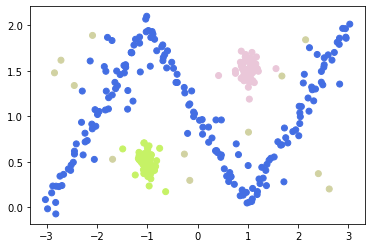

In [38]:
t0 = time.time()
clustering = hdbscan.HDBSCAN(min_cluster_size=6)
labels=clustering.fit_predict(data)
print("%s :\t%.2fs" % ('DBSCAN', time.time() - t0))
color=[]
for i in range(0,1000):
    color.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
newcolor=[]
for i in range(0,len(labels)):       
    newcolor.append(color[labels[i]])     
plt.scatter(x1,y1,color=newcolor)
plt.show()

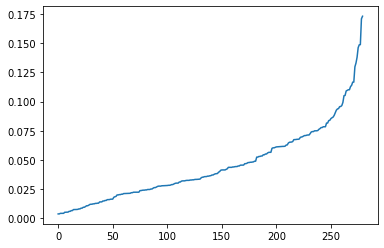

In [51]:
(x,y,data)=xyConstruct2("zgo.data")

elbow(data)

---------- zgo.data ----------
---------- DBSCAN ----------
SILHOUETTE
Temps :	0.12s
Pair (0.04, 8)


CALINSKI
Temps :	0.07s
Pair (0.07, 5)


BOULDIN
Temps :	0.14s
Pair (0.04, 8)




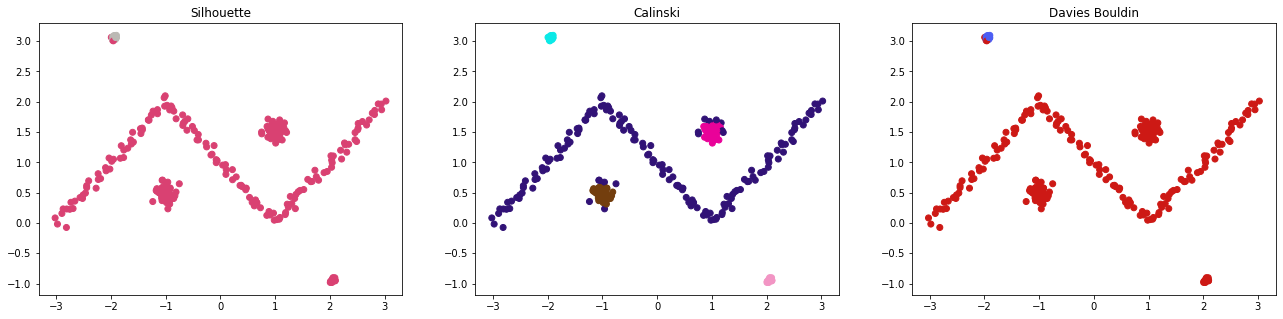

---------- HDBSCAN ----------
SILHOUETTE
Temps :	0.09s
Min cluster size 2


BOULDIN
Temps :	0.08s
Min cluster size 3


CALINSKI
Temps :	0.07s
Min cluster size 2




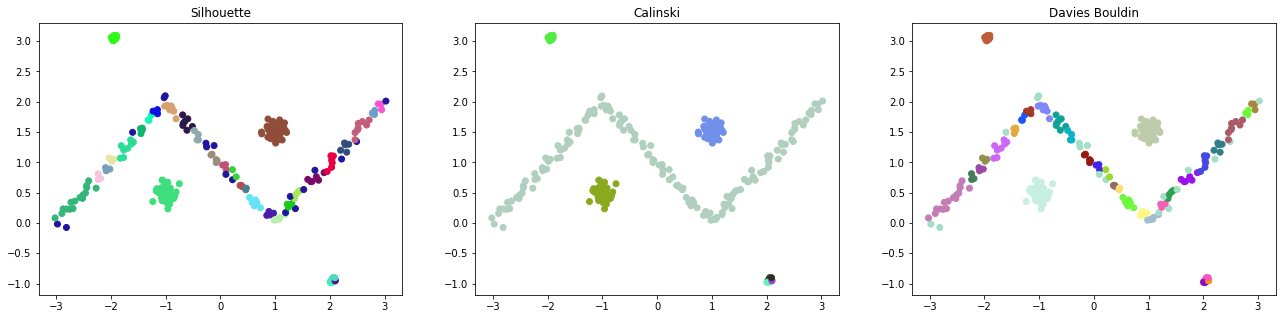

In [52]:
print("---------- zgo.data ----------")
"""
print("---------- KMEANS ----------")
score1,labels1=silhouette_metrics_kmeans(2,20,data)
score2,labels2=calinski_metrics_kmeans(2,20,data)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,data)
tri_plot(x,y,labels1,labels2,labels3)

print("---------- Agglomératif ----------")
for linkage in ('ward','average','complete','single'):
    print(linkage)
    score1,labels1=silhouette_metrics_agglo(x,y,2,20,data,linkage)
    score2,labels2=calinski_metrics_agglo(x,y,2,20,data,linkage)
    score3,labels3=davies_bouldin_metrics_agglo(x,y,2,20,data,linkage)
    #plot_score(score1,score2,score3,2,20)
    tri_plot(x,y,labels1,labels2,labels3)
"""
print("---------- DBSCAN ----------")
score1,labels1=silhouette_metrics_dbscan(data,0,0.08,0.01)
score2,labels2=calinski_metrics_dbscan(data,0,0.08,0.01)
score3,labels3=davies_bouldin_metrics_dbscan(data,0,0.08,0.01)
tri_plot(x,y,labels1,labels2,labels3)

print("---------- HDBSCAN ----------")
(x1,y1,newdata1)=xyConstruct2("zgo.data")
score1,labels1=silhouette_metrics_hdbscan(newdata1)
score2,labels2=davies_bouldin_metrics_hdbscan(newdata1)
score3,labels3=calinski_metrics_hdbscan(newdata1)
tri_plot(x1,y1,labels1,labels2,labels3)

In [19]:
def plot_cluster_3d(data,labels):
    figure=plt.figure()
    ax=plt.axes(projection='3d')
    ax.scatter3D(data[:,0], data[:,1], data[:,2], c=labels)
    plt.show()

In [20]:
def tri_plot_3d(data,labels1,labels2,labels3):
    fig = plt.figure(figsize=(30,5))
    ax = fig.add_subplot(141, projection='3d')
    ax.scatter3D(data[:,0], data[:,1], data[:,2], c=labels1)
    ax = fig.add_subplot(142, projection='3d')
    ax.scatter3D(data[:,0], data[:,1], data[:,2], c=labels2)
    ax = fig.add_subplot(143, projection='3d')
    ax.scatter3D(data[:,0], data[:,1], data[:,2], c=labels3)
    plt.show()

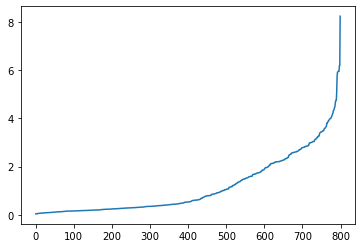

In [56]:
(x,y,data)=xyConstruct2("a.data")

elbow(data)

---------- a.data ----------
---------- KMEANS ----------
SILHOUETTE
Temps=  0.9194803237915039
Nombre de cluster:  7


CALINSKI
Temps=  0.7657268047332764
Nombre de cluster:  7


DAVIES BOULDIN
Temps=  0.806492805480957
Nombre de cluster:  6




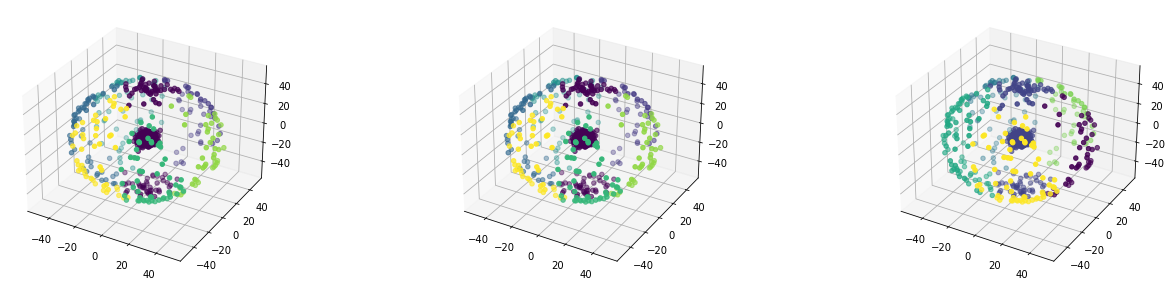

---------- Agglomératif ----------
ward
SILHOUETTE
ward :	0.28s
Nombre de cluster:  7


CALINSKI
ward :	0.14s
Nombre de cluster:  19


BOULDIN
ward :	0.19s
Nombre de cluster:  6




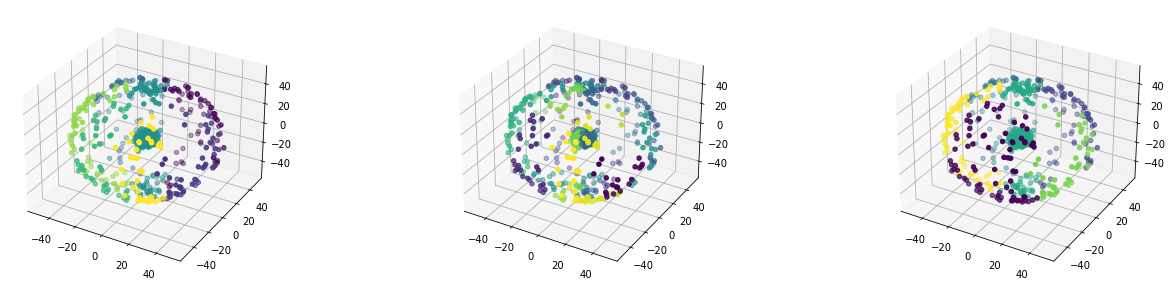

average
SILHOUETTE
average :	0.24s
Nombre de cluster:  7


CALINSKI
average :	0.13s
Nombre de cluster:  10


BOULDIN
average :	0.16s
Nombre de cluster:  7




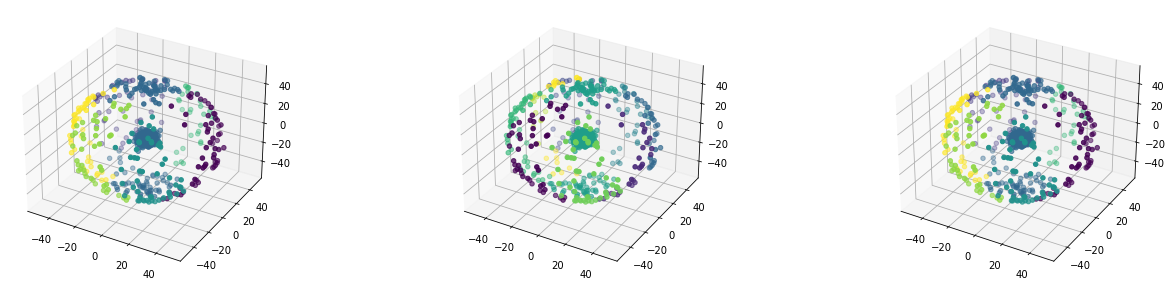

complete
SILHOUETTE
complete :	0.23s
Nombre de cluster:  8


CALINSKI
complete :	0.13s
Nombre de cluster:  9


BOULDIN
complete :	0.16s
Nombre de cluster:  7




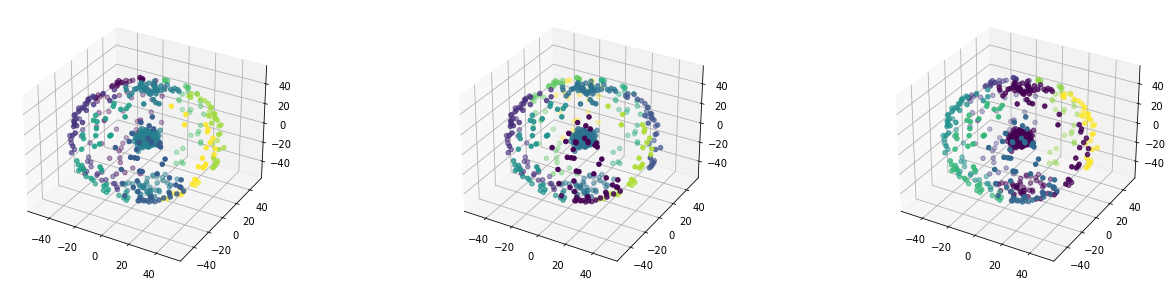

single
SILHOUETTE
single :	0.18s
Nombre de cluster:  2


CALINSKI
single :	0.08s
Nombre de cluster:  14


BOULDIN
single :	0.11s
Nombre de cluster:  2




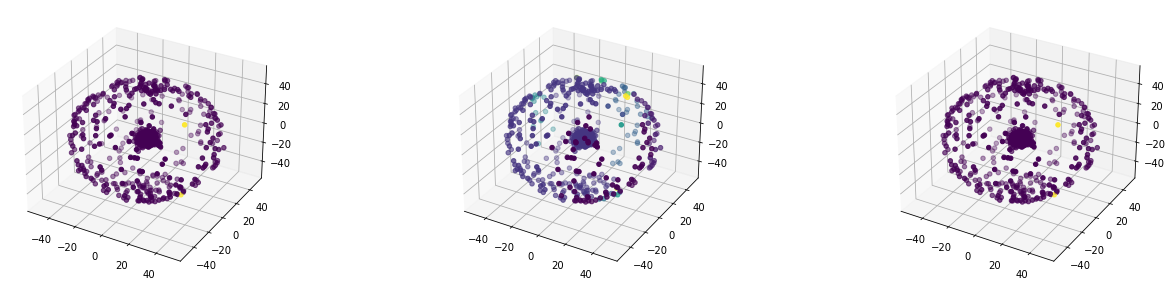

---------- DBSCAN ----------
SILHOUETTE
Temps :	0.53s
Pair (7, 9)


CALINSKI
Temps :	0.23s
Pair (5, 3)


BOULDIN
Temps :	0.33s
Pair (7, 2)




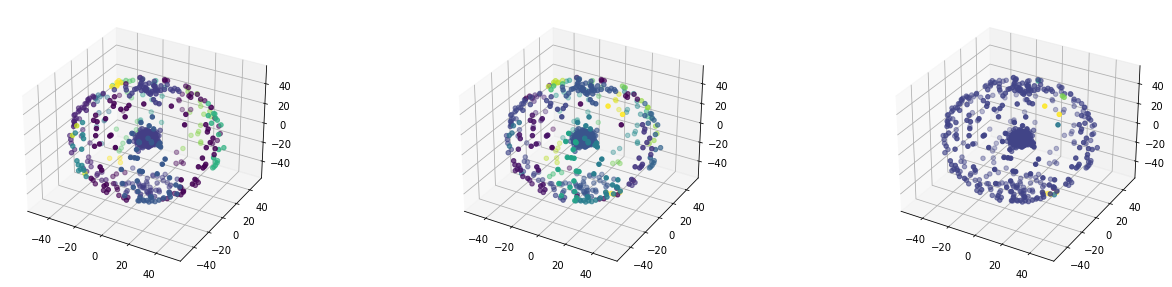

---------- HDBSCAN ----------
SILHOUETTE
Temps :	0.29s
Min cluster size 14


BOULDIN
Temps :	0.23s
Min cluster size 4


CALINSKI
Temps :	0.18s
Min cluster size 14




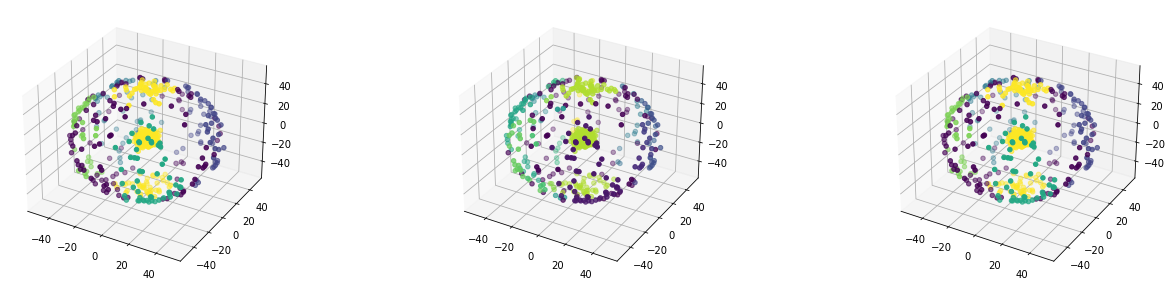

In [22]:
data2=loadDataSynthese("a.data")
print("---------- a.data ----------")

print("---------- KMEANS ----------")
score1,labels1=silhouette_metrics_kmeans(2,20,data)
score2,labels2=calinski_metrics_kmeans(2,20,data)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,data)
tri_plot_3d(data2,labels1,labels2,labels3)

print("---------- Agglomératif ----------")
for linkage in ('ward','average','complete','single'):
    print(linkage)
    score1,labels1=silhouette_metrics_agglo(x,y,2,20,data,linkage)
    score2,labels2=calinski_metrics_agglo(x,y,2,20,data,linkage)
    score3,labels3=davies_bouldin_metrics_agglo(x,y,2,20,data,linkage)
    tri_plot_3d(data2,labels1,labels2,labels3)

print("---------- DBSCAN ----------")
score1,labels1=silhouette_metrics_dbscan(data,0,8,1)
score2,labels2=calinski_metrics_dbscan(data,0,8,1)
score3,labels3=davies_bouldin_metrics_dbscan(data,0,8,1)
tri_plot_3d(data2,labels1,labels2,labels3)


print("---------- HDBSCAN ----------")
score1,labels1=silhouette_metrics_hdbscan(data)
score2,labels2=davies_bouldin_metrics_hdbscan(data)
score3,labels3=calinski_metrics_hdbscan(data)
tri_plot_3d(data2,labels1,labels2,labels3)

---------- DBSCAN ----------
SILHOUETTE
Temps :	8.61s
Pair (5.2, 3)


CALINSKI
Temps :	3.58s
Pair (5.75, 4)


BOULDIN
Temps :	5.42s
Pair (3.95, 3)




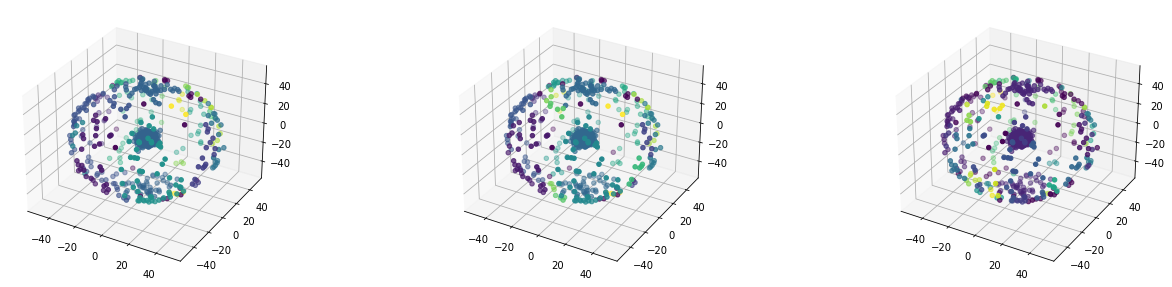

In [59]:
data2=loadDataSynthese("a.data")

print("---------- DBSCAN ----------")
score1,labels1=silhouette_metrics_dbscan(data,0,6,0.05)
score2,labels2=calinski_metrics_dbscan(data,0,6,0.05)
score3,labels3=davies_bouldin_metrics_dbscan(data,0,6,0.05)
tri_plot_3d(data2,labels1,labels2,labels3)

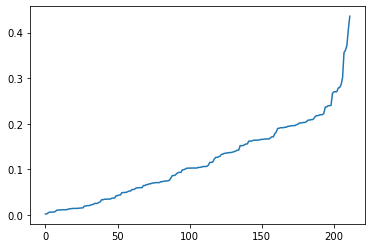

In [23]:
(x,y,data)=xyConstruct2("h.data")
data2=loadDataSynthese("h.data")

elbow(data)

---------- h.data ----------
---------- KMEANS ----------
SILHOUETTE
Temps=  0.4824366569519043
Nombre de cluster:  5


CALINSKI
Temps=  0.44089555740356445
Nombre de cluster:  5


DAVIES BOULDIN
Temps=  0.46994614601135254
Nombre de cluster:  5




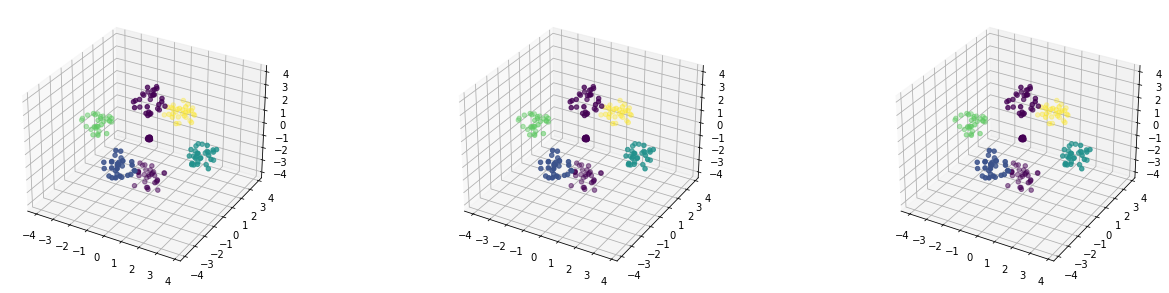

---------- Agglomératif ----------
ward
SILHOUETTE
ward :	0.04s
Nombre de cluster:  5


CALINSKI
ward :	0.02s
Nombre de cluster:  5


BOULDIN
ward :	0.05s
Nombre de cluster:  5




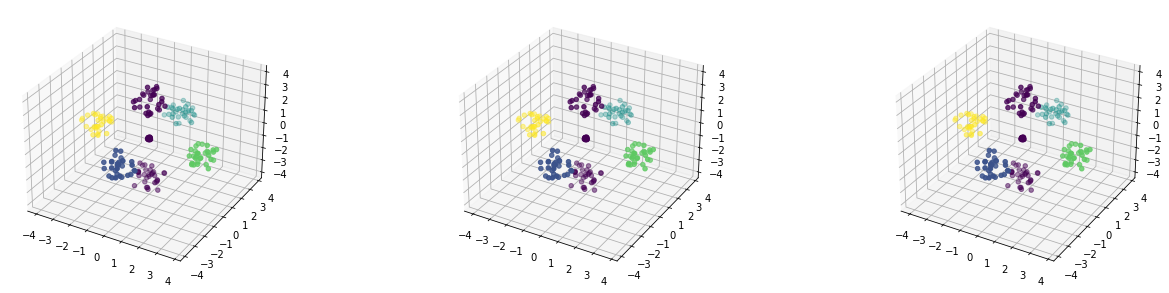

average
SILHOUETTE
average :	0.04s
Nombre de cluster:  5


CALINSKI
average :	0.02s
Nombre de cluster:  5


BOULDIN
average :	0.05s
Nombre de cluster:  5




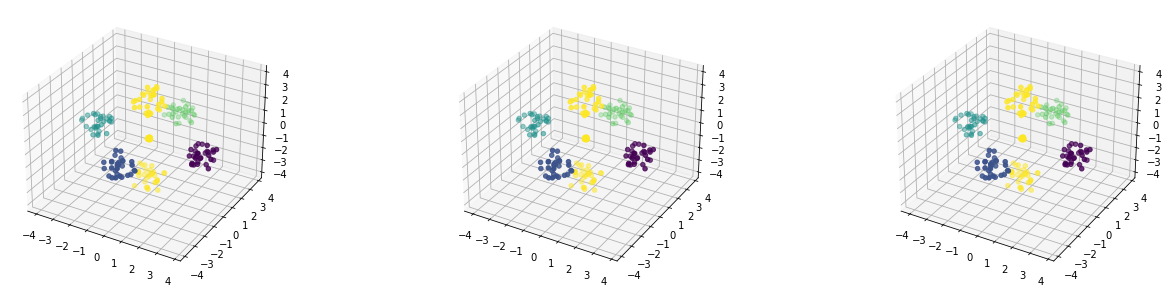

complete
SILHOUETTE
complete :	0.03s
Nombre de cluster:  5


CALINSKI
complete :	0.02s
Nombre de cluster:  5


BOULDIN
complete :	0.05s
Nombre de cluster:  5




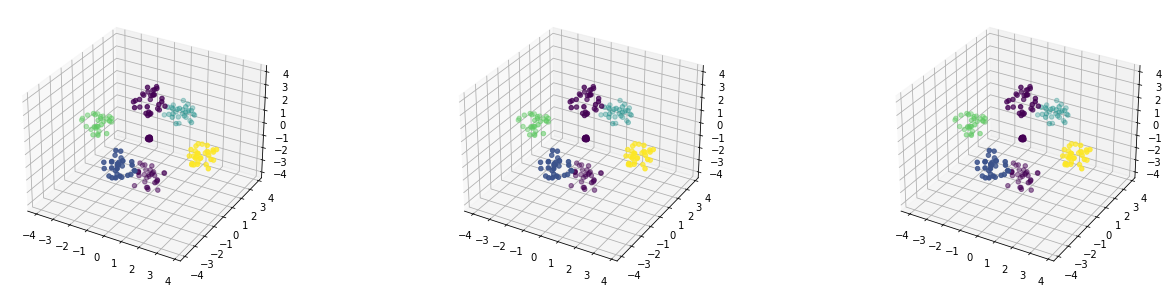

single
SILHOUETTE
single :	0.03s
Nombre de cluster:  5


CALINSKI
single :	0.02s
Nombre de cluster:  5


BOULDIN
single :	0.04s
Nombre de cluster:  5




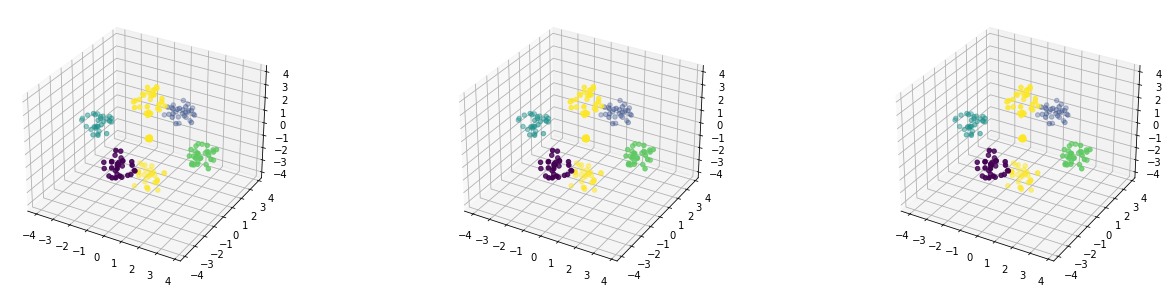

---------- DBSCAN ----------
SILHOUETTE
Temps :	0.05s
Pair (0.30000000000000004, 2)


CALINSKI
Temps :	0.03s
Pair (0.30000000000000004, 2)


BOULDIN
Temps :	0.06s
Pair (0.30000000000000004, 2)




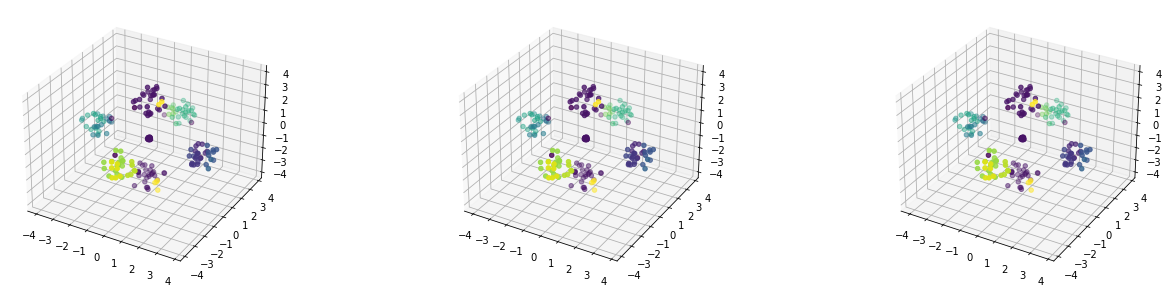

---------- HDBSCAN ----------
SILHOUETTE
Temps :	0.07s
Min cluster size 6


BOULDIN
Temps :	0.07s
Min cluster size 6


CALINSKI
Temps :	0.06s
Min cluster size 6




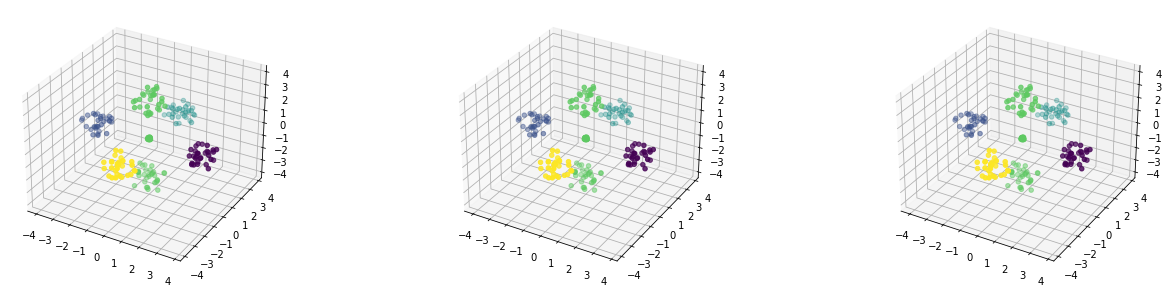

In [24]:

print("---------- h.data ----------")

print("---------- KMEANS ----------")
score1,labels1=silhouette_metrics_kmeans(2,20,data)
score2,labels2=calinski_metrics_kmeans(2,20,data)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,data)
tri_plot_3d(data2,labels1,labels2,labels3)

print("---------- Agglomératif ----------")
for linkage in ('ward','average','complete','single'):
    print(linkage)
    score1,labels1=silhouette_metrics_agglo(x,y,2,20,data,linkage)
    score2,labels2=calinski_metrics_agglo(x,y,2,20,data,linkage)
    score3,labels3=davies_bouldin_metrics_agglo(x,y,2,20,data,linkage)
    tri_plot_3d(data2,labels1,labels2,labels3)

print("---------- DBSCAN ----------")
score1,labels1=silhouette_metrics_dbscan(data,0,0.4,0.1)
score2,labels2=calinski_metrics_dbscan(data,0,0.4,0.1)
score3,labels3=davies_bouldin_metrics_dbscan(data,0,0.4,0.1)
tri_plot_3d(data2,labels1,labels2,labels3)

print("---------- HDBSCAN ----------")
score1,labels1=silhouette_metrics_hdbscan(data)
score2,labels2=davies_bouldin_metrics_hdbscan(data)
score3,labels3=calinski_metrics_hdbscan(data)
tri_plot_3d(data2,labels1,labels2,labels3)

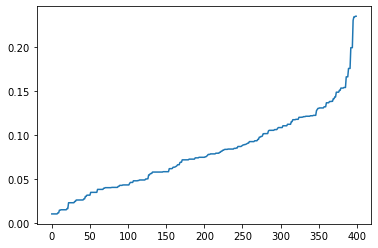

In [69]:
(x,y,data)=xyConstruct2("t.data")
data2=loadDataSynthese("t.data")

elbow(data)

---------- t.data ----------
---------- KMEANS ----------
SILHOUETTE
Temps=  0.7776408195495605
Nombre de cluster:  3


CALINSKI
Temps=  0.6970739364624023
Nombre de cluster:  3


DAVIES BOULDIN
Temps=  0.7070515155792236
Nombre de cluster:  3




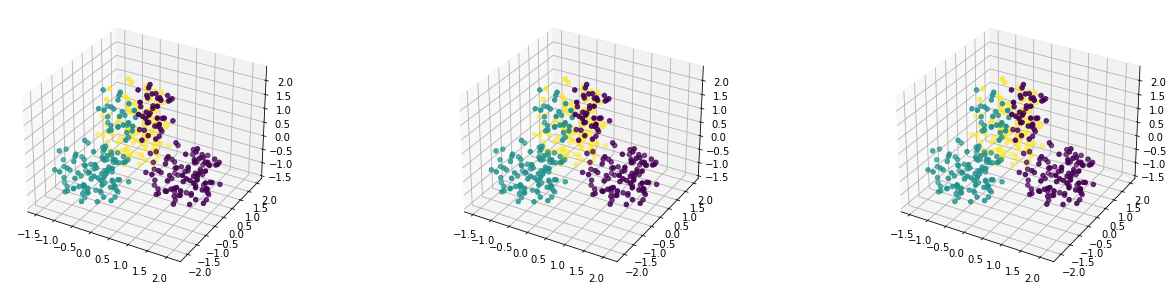

---------- Agglomératif ----------
ward
SILHOUETTE
ward :	0.08s
Nombre de cluster:  3


CALINSKI
ward :	0.05s
Nombre de cluster:  3


BOULDIN
ward :	0.08s
Nombre de cluster:  3




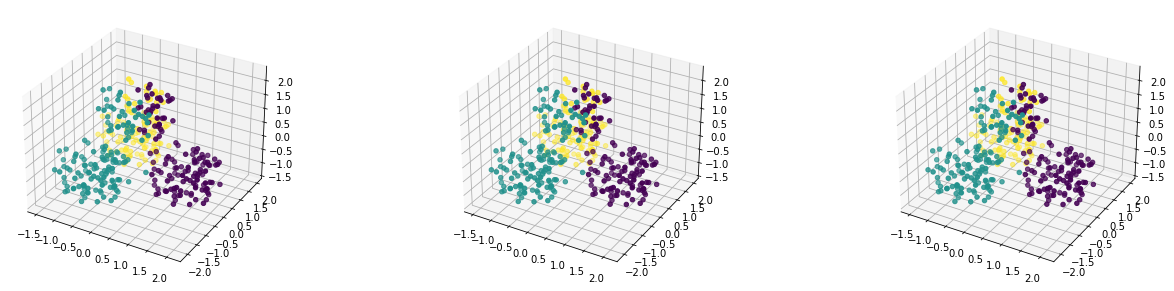

average
SILHOUETTE
average :	0.09s
Nombre de cluster:  3


CALINSKI
average :	0.05s
Nombre de cluster:  3


BOULDIN
average :	0.07s
Nombre de cluster:  3




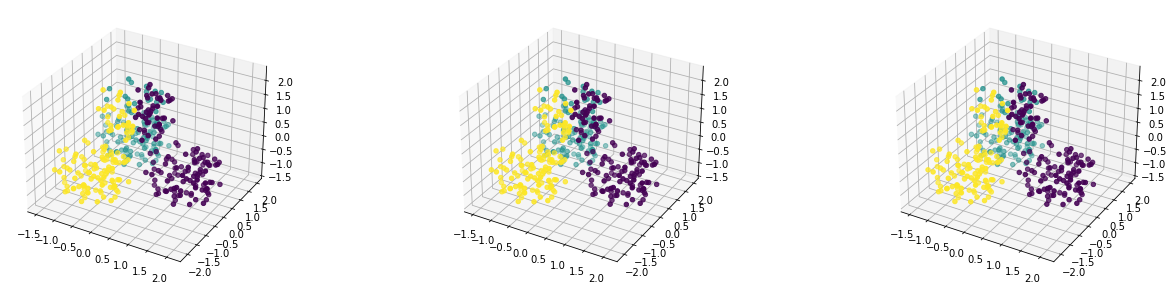

complete
SILHOUETTE
complete :	0.08s
Nombre de cluster:  3


CALINSKI
complete :	0.05s
Nombre de cluster:  3


BOULDIN
complete :	0.07s
Nombre de cluster:  3




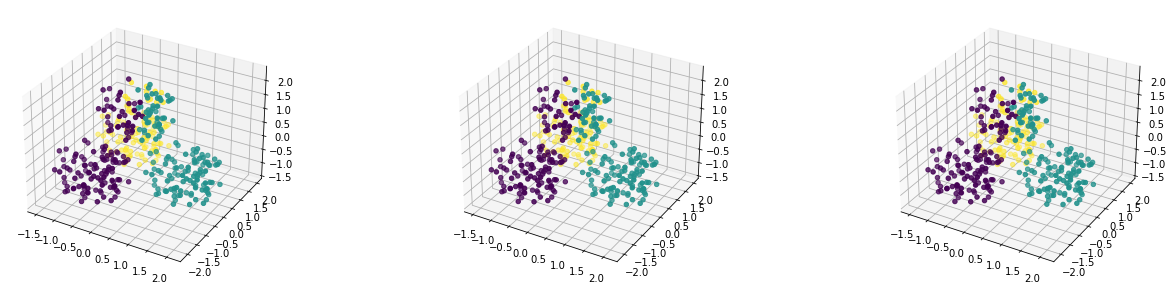

single
SILHOUETTE
single :	0.08s
Nombre de cluster:  2


CALINSKI
single :	0.03s
Nombre de cluster:  3


BOULDIN
single :	0.06s
Nombre de cluster:  4




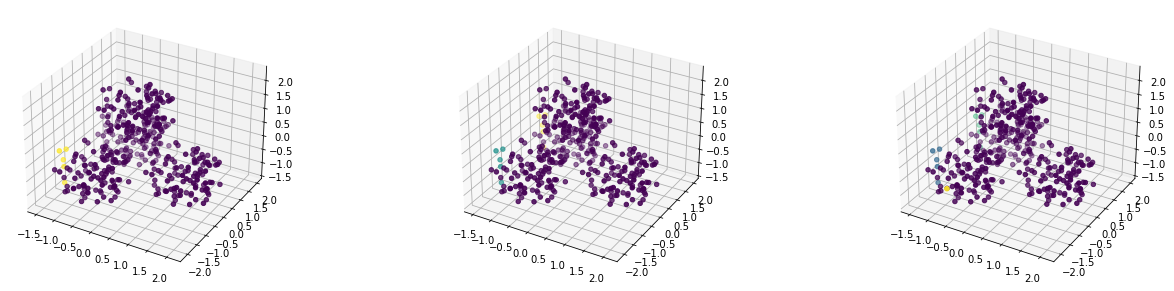

---------- DBSCAN ----------
SILHOUETTE
Temps :	0.41s
Pair (0.13, 2)


CALINSKI
Temps :	0.26s
Pair (0.16, 2)


BOULDIN
Temps :	0.52s
Pair (0.15, 2)




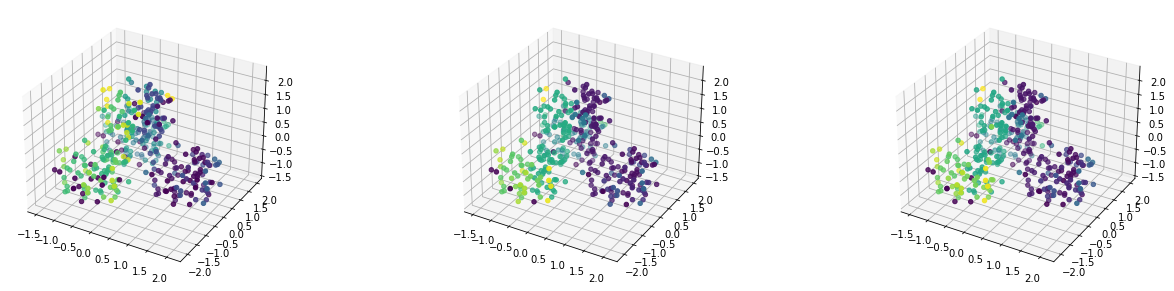

---------- HDBSCAN ----------
SILHOUETTE
Temps :	0.13s
Min cluster size 2


BOULDIN
Temps :	0.13s
Min cluster size 3


CALINSKI
Temps :	0.10s
Min cluster size 10




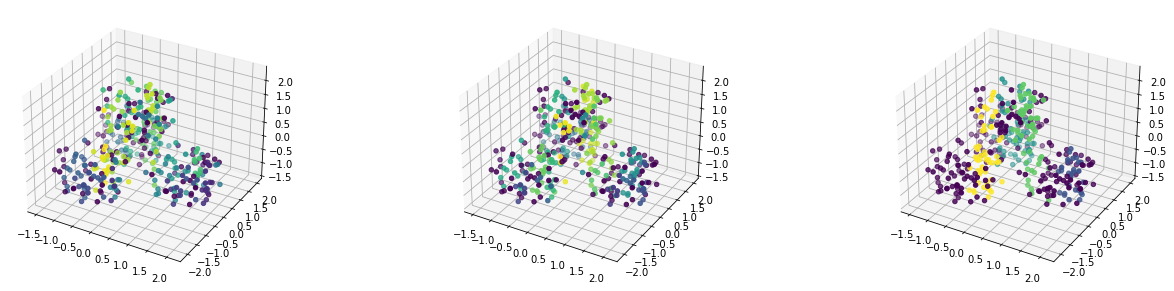

In [70]:
print("---------- t.data ----------")

print("---------- KMEANS ----------")
score1,labels1=silhouette_metrics_kmeans(2,20,data)
score2,labels2=calinski_metrics_kmeans(2,20,data)
score3,labels3=davies_bouldin_metrics_kmeans(2,20,data)
tri_plot_3d(data2,labels1,labels2,labels3)

print("---------- Agglomératif ----------")
for linkage in ('ward','average','complete','single'):
    print(linkage)
    score1,labels1=silhouette_metrics_agglo(x,y,2,20,data,linkage)
    score2,labels2=calinski_metrics_agglo(x,y,2,20,data,linkage)
    score3,labels3=davies_bouldin_metrics_agglo(x,y,2,20,data,linkage)
    #plot_score(score1,score2,score3,2,20)
    tri_plot_3d(data2,labels1,labels2,labels3)

print("---------- DBSCAN ----------")
score1,labels1=silhouette_metrics_dbscan(data,0,0.2,0.01)
score2,labels2=calinski_metrics_dbscan(data,0,0.2,0.01)
score3,labels3=davies_bouldin_metrics_dbscan(data,0,0.2,0.01)
tri_plot_3d(data2,labels1,labels2,labels3)

print("---------- HDBSCAN ----------")
score1,labels5=silhouette_metrics_hdbscan(data)
score2,labels6=davies_bouldin_metrics_hdbscan(data)
score3,labels7=calinski_metrics_hdbscan(data)
tri_plot_3d(data2,labels5,labels6,labels7)

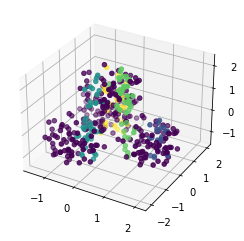

In [93]:

(x1,y1,newdata1)=xyConstruct2("t.data")
data2=loadDataSynthese("t.data")

t0 = time.time()
clustering = hdbscan.HDBSCAN(min_cluster_size=15)
labels=clustering.fit_predict(newdata1)
plot_cluster_3d(data2,labels)